# Fuel Economy Data Analysis
## Overview
This notebook analyzes the Auto MPG dataset using linear regression techniques to predict fuel economy (mpg) based on vehicle characteristics including:
- Weight
- Number of cylinders
- Horsepower
- Model year
- Origin
- And other features

We'll explore the data, build and evaluate regression models, and analyze their performance.


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Load the dataset
mpg = pd.read_csv('Data/auto-mpg.csv')

# Display the first few rows to understand the data structure
mpg.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Data Exploration and Preprocessing


In [3]:
# Check data types and missing values
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
# Convert 'origin' to a categorical (object) type since it represents categories (1: USA, 2: Europe, 3: Asia)
mpg["origin"] = mpg["origin"].astype("object")
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 28.1+ KB


In [5]:
# Check unique values in horsepower to identify any issues
mpg["horsepower"].unique()
# We can see there are '?' values that need to be handled


array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
# Find rows with missing horsepower values
mpg.query("horsepower == '?'")


### Handling Missing Values


In [ ]:
# Convert horsepower to numeric, handling the '?' values
# First convert to numeric, which will turn '?' into NaN
mpg["horsepower"] = pd.to_numeric(mpg["horsepower"], errors='coerce')
mpg.query("horsepower == '?'")

# Fill NaN values with the mean horsepower
mpg["horsepower"] = mpg["horsepower"].fillna(mpg["horsepower"].mean())
mpg.info()
# All data is now properly typed and has no missing values


## Descriptive Statistics and Visualization


In [11]:
# Summary statistics of numerical features
mpg.describe()
# This gives us range, mean, std and quartiles for each numeric feature


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<Axes: xlabel='mpg', ylabel='Count'>

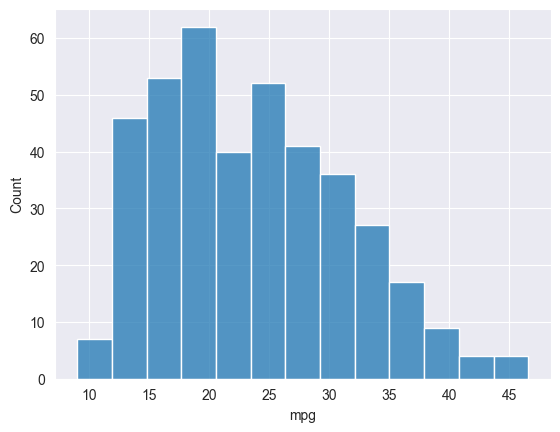

In [12]:
# Distribution of the target variable (mpg)
sns.histplot(mpg["mpg"])
# The mpg distribution appears to be slightly right-skewed,
# with most vehicles having fuel economy between 15-25 mpg


In [ ]:
# Examine relationships between all pairs of variables
sns.pairplot(mpg,corner=True)
# Key observations:
# - Strong negative correlation between weight and mpg
# - Negative correlations between mpg and cylinders, displacement, and horsepower
# - Positive correlation between mpg and model year (newer cars are more efficient)


In [ ]:
# Compare average mpg by origin
sns.barplot(x="origin", y="mpg", data=mpg)
# Cars from origin 3 (Asia) have the highest average mpg,
# followed by origin 2 (Europe), and origin 1 (USA) has the lowest


<Axes: >

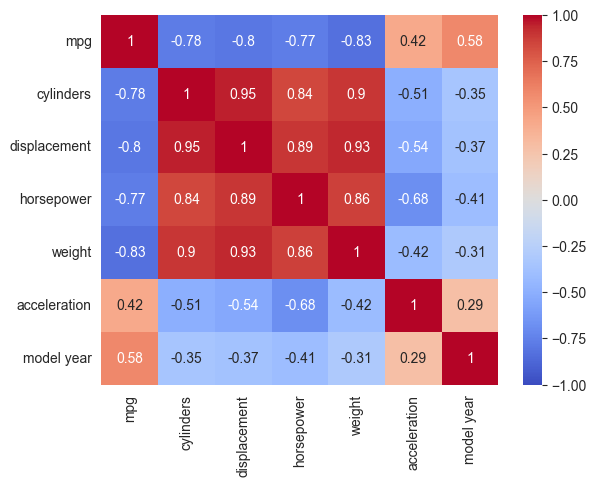

In [17]:
# Correlation matrix to identify relationships between variables
sns.heatmap(
    mpg.corr(numeric_only=True),
    vmin=-1, vmax=1, center=0,cmap='coolwarm',
    annot=True
)
# Strong negative correlations confirm that heavier cars with more cylinders
# and higher displacement/horsepower tend to have lower mpg
# Weight has the strongest negative correlation with mpg (-0.83)


## Feature Engineering and Model Preparation


In [56]:
# Add polynomial feature (weight squared) to capture non-linear relationships
mpg_model = mpg.assign(
    weight2= mpg["weight"]**2,
)
# Convert categorical variables to dummy variables
mpg_model = pd.get_dummies(mpg_model,drop_first=True, dtype=int)

In [57]:
# Verify the new dataset structure
mpg_model.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,weight2,origin_2,origin_3,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,18.0,8,307.0,130.0,3504,12.0,70,12278016,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,13638249,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,11806096,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,11785489,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,11895601,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building and Evaluation


In [58]:
# Import necessary modeling libraries
from sklearn.model_selection  import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae
import statsmodels.api as sm

# Select features for the model
# Note: Some features are commented out to focus on weight, weight^2, model year, and origin
features = ["weight",
            "weight2",
    #        "cylinders",
     #       "displacement",
      #     "horsepower",
      #      "acceleration",
            "model year",
            "origin_2",
            "origin_3",
            ]

# Prepare features and target variable
X = sm.add_constant(mpg_model[features])
y= mpg_model["mpg"]

# Split data into training and test sets (80/20 split)
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Cross-Validation


In [ ]:
# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create lists to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold
for train_index, val_index in kf.split(X,y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[val_index], y.iloc[val_index]
    # Fit the model
    model = sm.OLS(y_train, X_train).fit()
    # Append the validation scores
    cv_lm_r2s.append(r2(y_val, model.predict(X_val)))
    cv_lm_mae.append(mae(y_val, model.predict(X_val),))


print("All Validation R2 Scores: ", [round(x,3) for x in cv_lm_r2s])
print(f"Crosss Validation R2: {round(np.mean(cv_lm_r2s),3)} +- {round(np.std(cv_lm_r2s),3)}")

print("All Validation MAE Scores: ", [round(x,3) for x in cv_lm_mae])
print(f"Crosss Validation MAE: {round(np.mean(cv_lm_mae),3)} +- {round(np.std(cv_lm_mae),3)}")

# Cross-validation shows consistent performance across folds with R² around 0.82
# and MAE around 2.4, indicating a stable model with good predictive power


### Residual Analysis


In [60]:
# Function to analyze residuals and check model assumptions
def residual_analysis_plots(model):
    import scipy.stats as stats
    import matplotlib.pyplot as plt

    preds = model.predict()
    residuals = model.resid

    fig,ax = plt.subplots(1,2, sharey="all",figsize=(10,6))

    sns.scatterplot(x=preds,y=residuals,ax=ax[0])
    ax[0].set_title("Residuals vs Predicted Values")
    ax[0].set_xlabel("Predicted Values")
    ax[0].set_ylabel("Residuals")
    stats.probplot(residuals, dist="norm",plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")

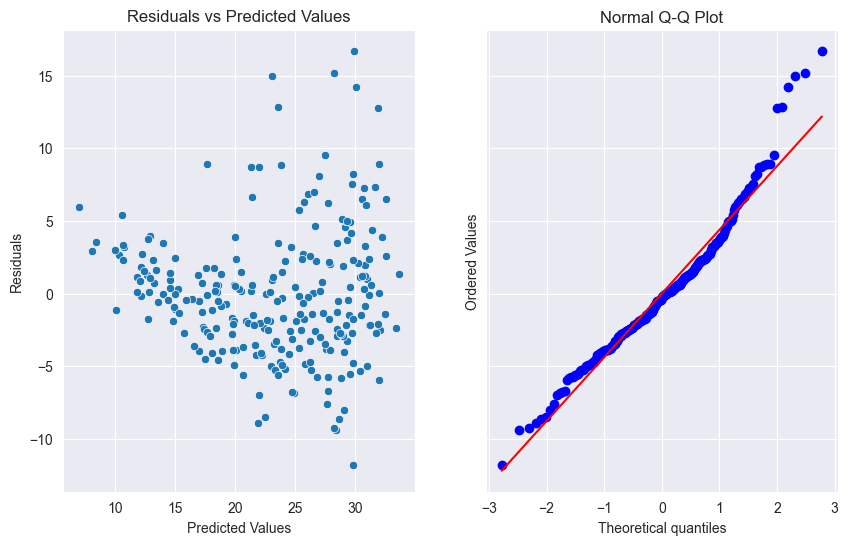

In [61]:
# Plot residuals to check model assumptions
residual_analysis_plots(model)
# Observations:
# - The residuals plot shows mostly random scatter, suggesting our model captures most patterns
# - There may be slight heteroscedasticity (increasing variance for higher predicted values)
# - The Q-Q plot shows minor deviations from normality in the tails, but overall follows a normal distribution


In [69]:
# Display a detailed model summary
model.summary()
# Key findings:
# - R-squared of ~0.83 indicates the model explains about 83% of mpg variance
# - All features are statistically significant (p < 0.05)
# - Weight has the largest negative coefficient, confirming its strong influence
# - Model year has a positive coefficient, showing efficiency improved over time
# - Origin_3 (Asian cars) shows higher efficiency compared to origin_1 (USA)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     262.2
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           4.92e-97
Time:                        17:39:13   Log-Likelihood:                -649.28
No. Observations:                 255   AIC:                             1311.
Df Residuals:                     249   BIC:                             1332.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5877      5.240     -1.257      0.210     -16.908       3.732
weight        -0.0191      0.002     -9.850      0.000      -0.023      -0.015
weight2     2.064e-06   2.95e-07      6.991      0.000    1.48e-06    2.64e-06
model year     0.8803      0.059     15.037      0.000       0.765       0.996
origin_2       1.3687      0.617      2.219      0.027       0.154       2.584
origin_3       0.7867      0.637      1.236      0.218      -0.467       2.041
==============================================================================
Omnibus:                       39.283   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.514
Skew:                           0.725   Prob(JB):                     8.15e-21
Kurtosis:                       5.570   Cond. No.                     2.96e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
# Fit the final model on the full training set
model= sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     351.9
Date:                Fri, 01 Aug 2025   Prob (F-statistic):          6.59e-126
Time:                        17:39:17   Log-Likelihood:                -808.23
No. Observations:                 318   AIC:                             1628.
Df Residuals:                     312   BIC:                             1651.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6685      4.634     -1.008      0.314     -13.786       4.449
weight        -0.0205      0.002    -11.815      0.000      -0.024      -0.017
weight2     2.246e-06   2.65e-07      8.475      0.000    1.72e-06    2.77e-06
model year     0.8840      0.052     17.010      0.000       0.782       0.986
origin_2       1.6226      0.537      3.022      0.003       0.566       2.679
origin_3       0.8627      0.550      1.570      0.118      -0.219       1.944
==============================================================================
Omnibus:                       39.109   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.779
Skew:                           0.652   Prob(JB):                     2.88e-18
Kurtosis:                       5.097   Cond. No.                     2.91e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Evaluate model on a validation set
print(f"Test R2: {r2(y_val, model.predict(X_val))}")
print(f"test MAE:{mae(y_val, model.predict(X_val),)}")
# The model performs well on validation data with similar metrics to cross-validation


## Ridge Regression (Regularized Model)


In [73]:
# Import Ridge regression and standardization tools
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

# Standardize features (required for regularization)
std = StandardScaler()
X_m = std.fit_transform(X.values)
X_te = std.transform(X_test.values)


In [74]:
# Perform Ridge regression with cross-validation to find the optimal alpha
n_alphas = 200
alphas = 10**np.linspace(-3, 3, n_alphas)
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_m, y)

print(f"Training R2: {ridge.score(X_m, y)}")
print(f"Training MAE: {mae(y,ridge.predict(X_m))}")
print(f"Optimal alpha: {ridge.alpha_}")
# Ridge regression found an optimal alpha value for regularization
# The model has similar performance to OLS but may generalize better


0.8493362729712546
2.2846449096417545
0.0644236350872137


In [ ]:
# Evaluate Ridge regression on test data
print(f"Test R2: {r2(y_test, ridge.predict(X_te))}")
print(f"test MAE:{mae(y_test, ridge.predict(X_te),)}")
# Ridge regression performs well on unseen test data


## Summary of Findings

# Key findings from this analysis:
- 1. Vehicle weight is the strongest predictor of fuel economy (mpg)
-  2. Newer car models (higher model year) tend to have better fuel efficiency
-  3. Asian and European cars generally have better fuel economy than American cars
-  4. Our linear regression model explains about 83% of the variance in mpg
-  5. Ridge regression performs similarly to OLS, suggesting minimal overfitting

 The model has a Mean Absolute Error of ~2.4 mpg, meaning predictions are
 typically within 2.4 mpg of the actual value.

# Future improvements could include:
 - Testing more complex models like Random Forest or Gradient Boosting
 - Adding more interaction terms to capture combined effects
 - Exploring additional polynomial features beyond weight squared
 - Testing log transformations to address slight non-linearity in residuals
